В проектируемой локальной сети есть заданное количество компьютеров.
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров. Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.

__1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.__

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Общий вид целевой функции:

__TF = np.minimum(TF_w, TF_r)__ - целевая функция

__TF_w = n_computers * 30 * L_sum_comp_server__ - суммарная стоимость без маршрутизатора

__n_computers__ - количество компьютеров

__L_sum_comp_server__ - сумма расстояний от компьютеров до сервера

__TF_r = (n_computers * 30 * L_sum_comp_router) + (n_routers * 12 * L_sum_server_router) + router_imp * (n_routers * router_price * coef_serv)__ - суммарная стоимость с маршрутизаторами

__L_sum_comp_router__ - сумма расстояний от компьютеров до "своего" маршрутизатора

__n_routers__ - количество маршрутизаторов

__router_price__ - цена маршрутизатора

__router_imp__ - коэффициент значимости маршрутизатора

__L_sum_server_router__ - сумма расстояний от маршрутизаторов до сервера

__coef_serv__ - коэффициент стоимости обслуживания маршрутизатора

__2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*__

Для простоты и однозначности отображения будем задавать положение каждого элемента в координатах.

In [2]:
price_opt = 12                              # цена оптоволокна
price_twp = 30                              # цена витой пары

l = 200                                     # длина проектируемого пространства
w = 200                                     # ширина проектируемого пространства
n_computers = 15                            # количество компьютеров
price_router = 2000                         # цена маршрутизатора
n_routers = 3                               # количество маршрутизаторов

In [3]:
# генерация исходных данных
server = (0, 0)                                                                                       # координаты сервера
computers = np.array([(np.random.randint(l), np.random.randint(w)) for _ in range(n_computers)])      # координаты компьютеров

# расстояния от сервера до компьютеров
l_comp_server = np.array(((computers[:, 0] - server[0])**2 + (computers[:, 1] - server[1])**2)**0.5)

# расстояния каждого компьютера до остальных компьютеров
l_comp_comp = np.array([((computers[:, 0] - computers[i, 0])**2 + (computers[:, 1] - computers[i, 1])**2)**0.5 
                        for i in range(n_computers)])

In [4]:
# расчет координат маршрутизаторов как среднего в кластере компьютеров
routers = dict()
for cluster in np.hsplit(np.argsort(l_comp_server), n_routers):
    routers[tuple(computers[cluster].mean(axis=0))] = cluster

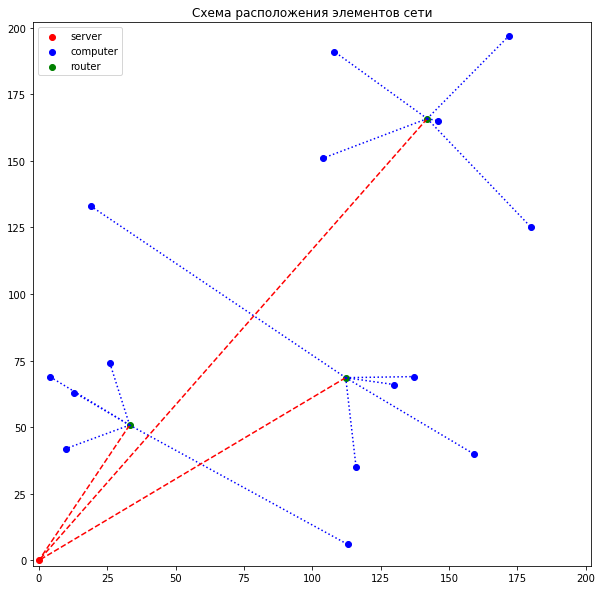

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(server[0], server[1], color="red", label="server")
plt.scatter(computers[:, 0], computers[:, 1], color="blue", label="computer")

for router in routers.keys():
    x1, y1 = router
    plt.plot([x1, server[0]], [y1, server[1]], 'r--')
    for comp in computers[routers[router]]:
        x2, y2 = comp
        plt.plot([x1, x2], [y1, y2], 'b:')
        
plt.scatter([coord[0] for coord in routers.keys()], [coord[1] for coord in routers.keys()], color="green", label="router")
    
plt.xlim(-l * 0.01, l * 1.01)
plt.ylim(-w * 0.01, w * 1.01)
plt.legend()
plt.title("Схема расположения элементов сети")
plt.show()

Для построения плоскости стоимости примем положение компьютеров и сервера постоянным, а количество маршрутизаторов примем равным 1 и уменьшим количество компьютеров до 8 (максимум для маршрутизатора). Положение маршрутизатора будем менять по прямой x=y.

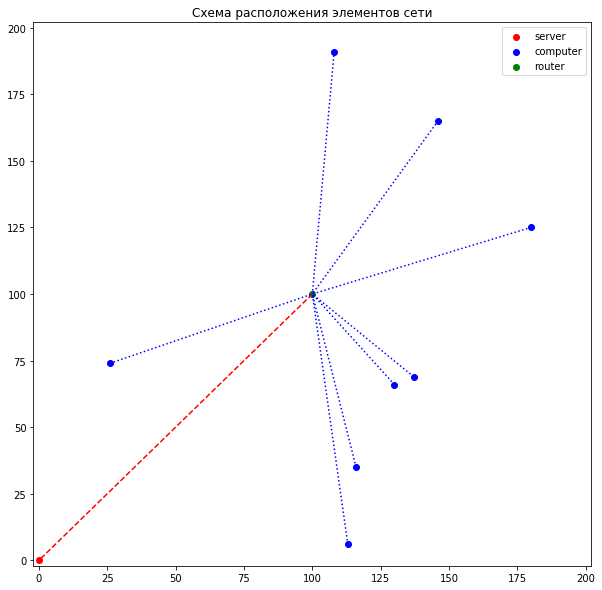

In [6]:
one_router = (100, 100)
less_comp = computers[:8]

plt.figure(figsize=(10, 10))
plt.scatter(server[0], server[1], color="red", label="server")
plt.scatter(less_comp[:, 0], less_comp[:, 1], color="blue", label="computer")
plt.scatter(one_router[0], one_router[1], color="green", label="router")

plt.plot([one_router[0], server[0]], [one_router[1], server[1]], 'r--')

for comp in less_comp:
    x1, y1 = comp
    plt.plot([x1, one_router[0]], [y1, one_router[1]], 'b:')
    
plt.xlim(-l * 0.01, l * 1.01)
plt.ylim(-w * 0.01, w * 1.01)
plt.legend()
plt.title("Схема расположения элементов сети")
plt.show()

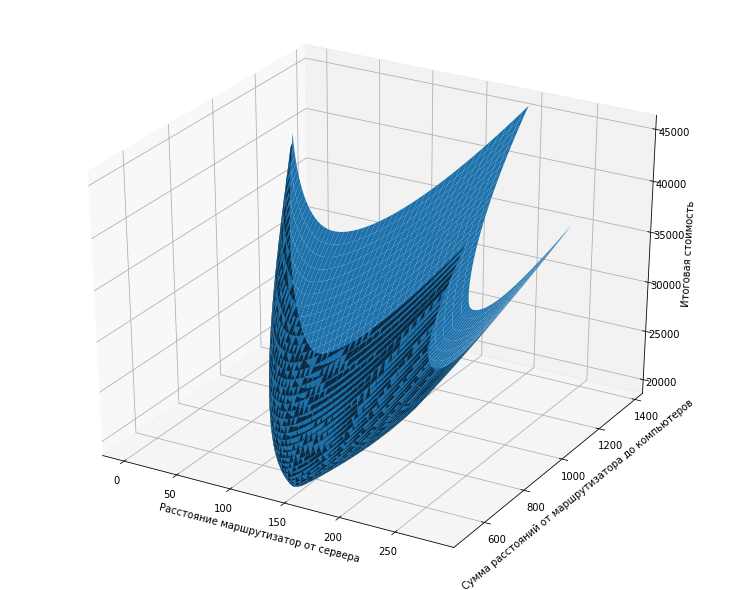

In [7]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(10, 8))
ax = Axes3D(fig)
max_coord = (200, 200)

# матрица расстояний от маршрутизатора до сервера
L_sum_router = np.sqrt(np.arange(max_coord[0]).reshape(1, -1)**2 + np.arange(max_coord[0]).reshape(-1, 1)**2)
                       
# сумма расстояний от маршрутизатора до компьютеров
L_sum_comp = np.zeros(max_coord)
for row in np.arange(max_coord[1]):
    for col in np.arange(max_coord[0]):
        L_sum_comp[row, col] = np.sqrt((less_comp[:, 0] - col)**2 + (less_comp[:, 1] - row)**2).sum()

Total_price = price_opt * L_sum_router + price_twp * L_sum_comp + price_router
ax.set_xlabel('Расстояние маршрутизатор от сервера')
ax.set_ylabel('Сумма расстояний от маршрутизатора до компьютеров')
ax.set_zlabel('Итоговая стоимость')
ax.plot_surface(L_sum_router, L_sum_comp, Total_price, shade=True);